In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [371]:
df=pd.read_csv("train.csv")

In [372]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,B28,NaN
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.50,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.50,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.75,NaN,Q
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.00,NaN,S


In [373]:
#we rearranged the coloumns with label at the end for better clarity
df=df[["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Survived"]]

In [374]:
df.sample(5)
#891 rows and 12 features
#passengerId 
#Pclass - 1st class,2nd class,3rd class passenger
#Name
#sex - Male ,Female
#Age 
#SibSp - Significant other or spouse present
#Parch - children / parents aboard
#Ticket
#Fare 
#Cabin
#Embarked- port of embark
#Survived - 0 - did not survive  , 1 - survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
297,298,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
97,98,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
785,786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,0
261,262,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,1
847,848,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C,0


Basic exploratory data analysis

In [375]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 features

In [376]:
df.info

<bound method DataFrame.info of      PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  

In [377]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [378]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

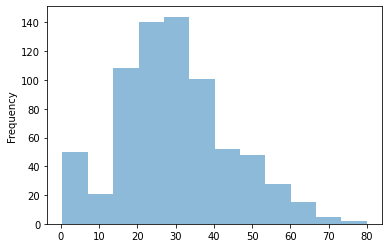

In [379]:
#dataset contains mostly people of age group between 15 to 40
x = df["Age"].plot.hist(bins=12, alpha=0.5)

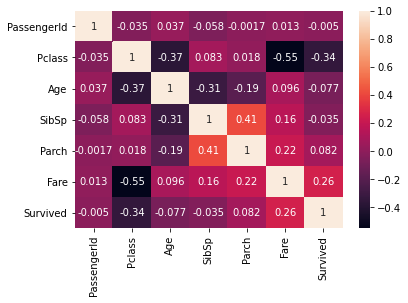

In [380]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

The corelation matrix shows that age and survival isnt highy correalted ,
parch(children present) and fare have a postive correlation higher the fare your survival chance increases while Passengerclass has a high negative correlation that means 1st class passengers have higher chance of survival.
Age,sibSp(spouse present) show negative correlation as well

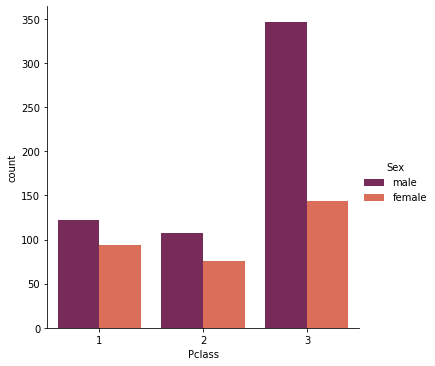

In [381]:
sns.catplot(x='Pclass', data=df,kind='count', hue='Sex',palette='rocket')
#most pasengers were from the 3rd class male

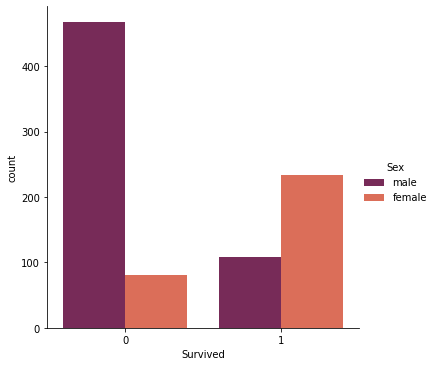

In [382]:
sns.catplot(x='Survived', data=df,kind='count', hue='Sex',palette='rocket')
#most deaths is seen in male 
#most survival is seen in female

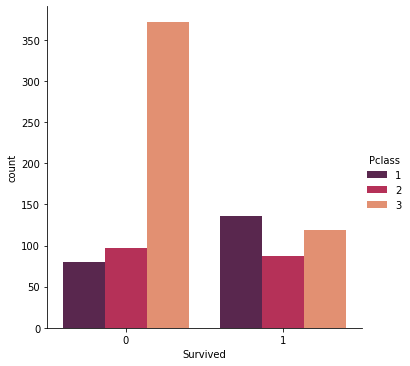

In [383]:
sns.catplot(x='Survived', data=df,kind='count', hue='Pclass',palette='rocket')
#most survival rate is seen in 1st class passengers
#most death rate is seen in 3rd class passengers
#It can been seen that women children and 1st class passengers were given priority while exiting the ship

<AxesSubplot:xlabel='Survived', ylabel='Age'>

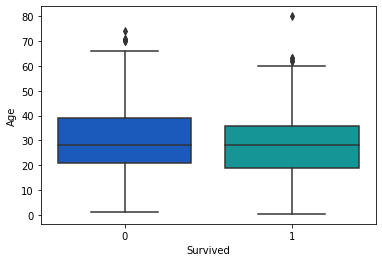

In [384]:
sns.boxplot(x='Survived',y='Age',data=df,palette='winter')
#most deaths is seen in male 
#most survival is seen in female

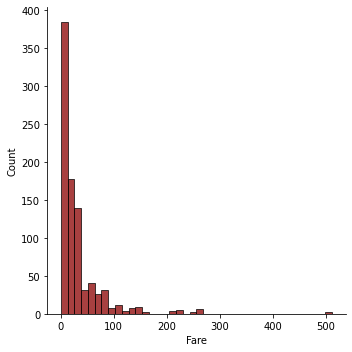

In [385]:
sns.displot(df['Fare'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='count', ylabel='Age'>

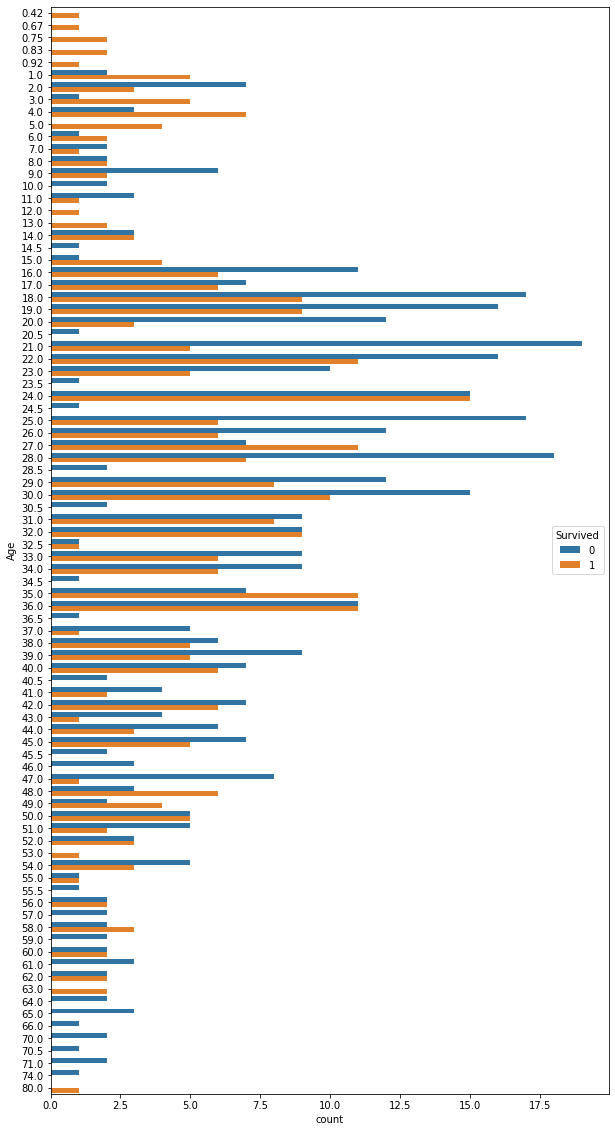

In [386]:
plt.figure(figsize=(10, 20))
sns.countplot(y = "Age",hue="Survived", data=df)

In [387]:
print(df["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [388]:
print(df["SibSp"].value_counts())
#some of these values are outliers since mostly people dont have multiple spouse

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [389]:
print(df["Parch"].value_counts())

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


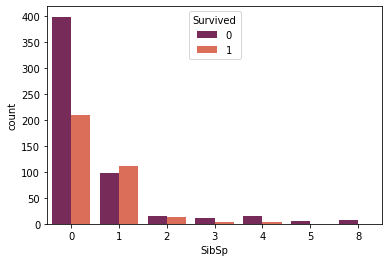

In [390]:
ax = sns.countplot(x = "SibSp",hue="Survived", data=df,palette='rocket')
#not havin spouse increases your chance of survival

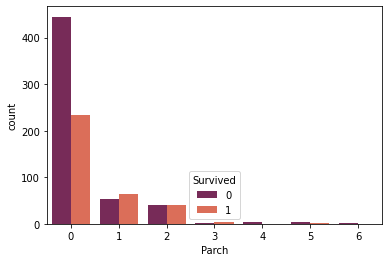

In [391]:
ax = sns.countplot(x = "Parch",hue="Survived", data=df,palette='rocket')

In [392]:
#seprating numeric and catogrorical data
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes(["object"])

In [393]:
#checking if duplicate rows are present or not
duplicate=df.duplicated()
print(duplicate.sum())

0


CHECKING FOR OUTLIERS

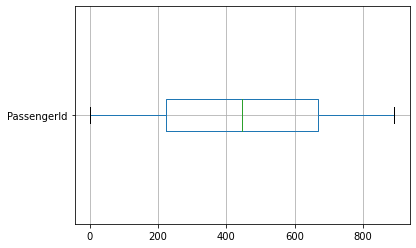

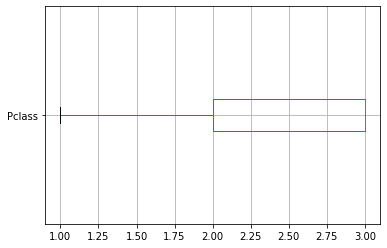

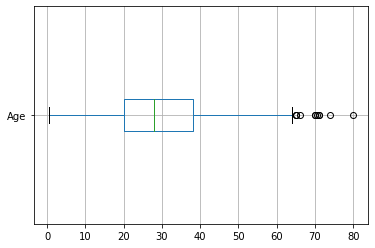

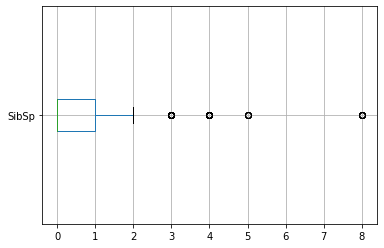

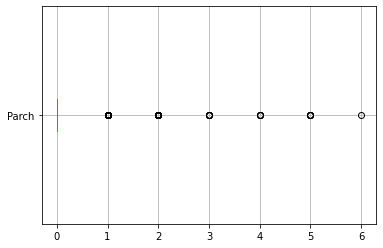

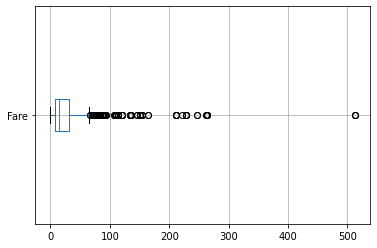

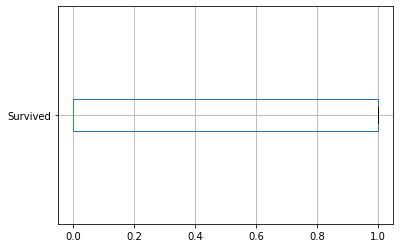

In [394]:
for x in df_num.columns:
    df.boxplot(column=[x],vert = False)
    plt.show()
    
#we wont be removing outliers as it seems like it is the orginal data as in SibSp there is a posiblility of 
#people haveing multiple spouse,as of that of Fair 1st class fare is more expensive and varied compared to 
#2nd and 3rd class fares

CHECKING FOR NULL VALUE

In [395]:
def missing_data(data):
    mis_data=pd.DataFrame({"ColumnName":[],"sum_missing":[],"percentage_miss":[]})
    for col in data.columns:
        sum_missing=data[col].isnull().sum()
        percentage_miss=round((sum_missing/data.shape[0])*100,2)
        mis_data=mis_data.append(dict(zip(mis_data.columns,[col,sum_missing,percentage_miss])),ignore_index=True)
    return mis_data

In [396]:
mis_data=missing_data(df)
display(mis_data[mis_data["percentage_miss"]>0.0])
print(f"Number of columns with missing values:{str(mis_data[mis_data['percentage_miss']>0.0].shape[0])}")

,ColumnName,sum_missing,percentage_miss
4,Age,177.0,19.87
9,Cabin,687.0,77.10
10,Embarked,2.0,0.22


Number of columns with missing values:3


In [397]:
#as Cabin has 77% missing values we can drop cabin all together
#as passenger id acts like index ,name and tciket doesnt have any major effect on our prediction
df=df.drop(columns=['Cabin',"Name","PassengerId","Ticket"])

In [398]:
df.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
880,2,female,25.0,0,1,26.0000,S,1
142,3,female,24.0,1,0,15.8500,S,1
286,3,male,30.0,0,0,9.5000,S,1
239,2,male,33.0,0,0,12.2750,S,0
329,1,female,16.0,0,1,57.9792,C,1


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

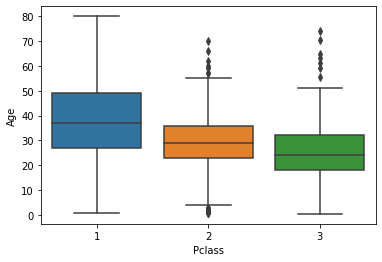

In [399]:
sns.boxplot(x='Pclass',y='Age',data=df)
#we get generanal estimate of age of unknown age group by mean 

In [400]:
#To replace the Nan value in age we will perform mean imputit with mean related to the class
def impute_age_df(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age

In [401]:
df['Age']=df[['Age','Pclass']].apply(impute_age_df,axis=1)

In [402]:
df.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
486,1,female,35.0,1,0,90.0000,S,1
797,3,female,31.0,0,0,8.6833,S,1
786,3,female,18.0,0,0,7.4958,S,1
787,3,male,8.0,4,1,29.1250,Q,0
96,1,male,71.0,0,0,34.6542,C,0


In [403]:
df['Embarked'].describe()
#as S occurs the most frequently and by a great margin we can replace NaN with S

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [404]:
df['Embarked'] = df['Embarked'].fillna("S")

In [405]:
#CHECK FOR MISSING VALUES AGAIN
mis_data=missing_data(df)
display(mis_data[mis_data["percentage_miss"]>0.0])
print(f"Number of columns with missing values:{str(mis_data[mis_data['percentage_miss']>0.0].shape[0])}")
#we dont have any missing values left 

,ColumnName,sum_missing,percentage_miss


Number of columns with missing values:0


CATAGORICAL FEATURES

In [406]:
def Cat_features(df):
    
    Embarked = pd.get_dummies(df['Embarked'],drop_first=True)
    df['Sex']=df['Sex'].map({'male':0,'female':1})
    df.drop(['Embarked'],axis=1,inplace=True)
    df = pd.concat([df,Embarked],axis=1)
    
    return df

In [407]:
df=Cat_features(df)

In [408]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Q,S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,1
888,3,1,24.0,1,2,23.4500,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0


In [409]:
#we rearranged the coloumns again with label at the end for better clarity
df=df[["Pclass","Sex","Age","SibSp","Parch","Fare","Q","S","Survived"]]

 MODELING

In [410]:
#Train test split
x_train, x_test, y_train, y_test=train_test_split(
    df.iloc[:, :-1],
    df["Survived"] ,
    test_size=0.2,
    random_state=41)

DECISION TREE

In [411]:
DS=DecisionTreeClassifier(random_state=0, max_depth=8)

In [412]:
DS.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [413]:
DS_preds=DS.predict(x_test)

In [414]:
DS_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0])

In [415]:
print('F1 score : ', np.round(f1_score(y_test, DS_preds)*100,2))

F1 score :  79.39


RANDOM FOREST

In [416]:
rf=RandomForestClassifier(n_estimators = 100)

In [417]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [418]:
rf_preds=rf.predict(x_test)

In [419]:
rf_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0])

In [420]:
print('F1 score : ', np.round(f1_score(y_test, rf_preds)*100,2))

F1 score :  74.07


TEST SET

In [421]:
test_df=pd.read_csv("test.csv")

In [422]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
183,1075,3,"Lane, Mr. Patrick",male,NaN,0,0,7935,7.7500,NaN,Q
208,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
338,1230,2,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C


In [423]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [424]:
#checking if duplicate rows are present or not
duplicate=df.duplicated()
print(duplicate.sum())

116


In [425]:
test_mis_data=missing_data(test_df)
display(test_mis_data[test_mis_data["percentage_miss"]>0.0])
print(f"Number of columns with missing values:{str(test_mis_data[test_mis_data['percentage_miss']>0.0].shape[0])}")

,ColumnName,sum_missing,percentage_miss
4,Age,86.0,20.57
8,Fare,1.0,0.24
9,Cabin,327.0,78.23


Number of columns with missing values:3


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

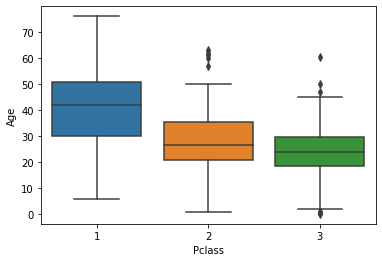

In [426]:
sns.boxplot(x='Pclass',y='Age',data=test_df)

In [427]:
#imputing missing value
def impute_age_test(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else :
            return 25
    else:
        return Age

In [428]:
test_df['Age']=test_df[['Age','Pclass']].apply(impute_age_test,axis=1)

In [429]:
#as Cabin ,Name ,PassengerId ,Ticket were already dropped in the Train dataset so we drop them here too
test_df=test_df.drop(columns=['Cabin',"Name","PassengerId","Ticket"])

In [430]:
#we replaced the one missing value with the mean
test_df["Fare"]=df["Fare"].fillna(35.6)

In [431]:
#re-check for missing values
test_mis_data=missing_data(test_df)
display(test_mis_data[test_mis_data["percentage_miss"]>0.0])
print(f"Number of columns with missing values:{str(test_mis_data[test_mis_data['percentage_miss']>0.0].shape[0])}")

,ColumnName,sum_missing,percentage_miss


Number of columns with missing values:0


In [432]:
#catogorical features
test_df=Cat_features(test_df)

In [433]:
test_df.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
75,1,0,32.5,0,0,7.65,0,0
386,3,0,24.0,0,0,46.90,0,1
372,1,0,49.0,0,0,8.05,0,1
145,3,0,31.0,3,0,36.75,0,1
33,3,1,25.0,1,2,10.50,0,1


In [434]:
#using test data set and getting the predictions by model we built

In [435]:
#random forest
rf_Test_preds=rf.predict(test_df)

In [436]:
rf_Test_preds

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [437]:
#Decision tree 

In [438]:
test_DS_preds=DS.predict(test_df)

In [439]:
test_DS_preds

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,